In [40]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_finance import candlestick_ochl
import talib

In [32]:
stock_day=pd.read_csv("stock_day.csv")
stock_day = stock_day.sort_index()

In [33]:
stock_day.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,96291.73,96291.73,96291.73,3.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16


/Users/mac/.virtualenvs/ai/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/Users/mac/.virtualenvs/ai/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in less


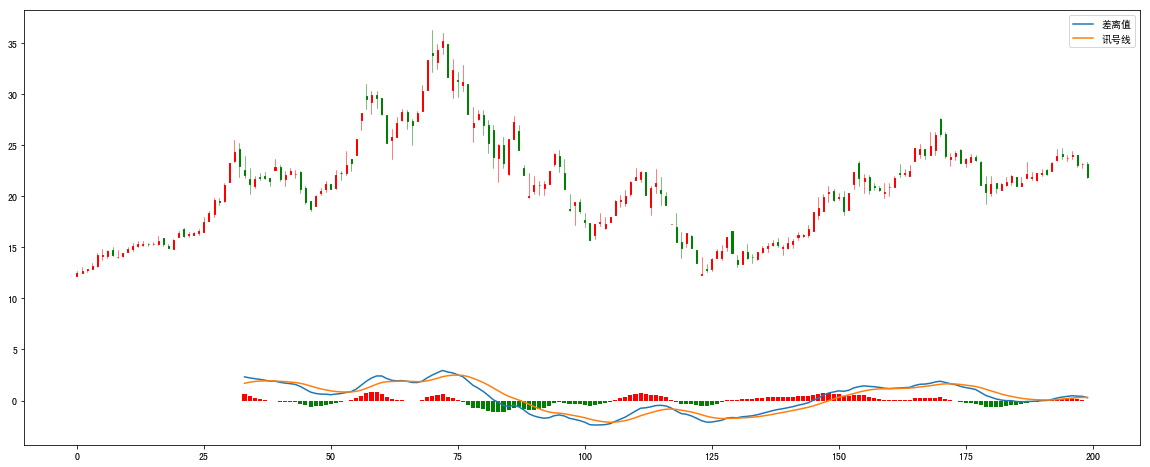

In [46]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(20,8))
values=stock_day[['open','close','high','low']][:200]
values['time']=[i for i in range(200)]
values=values[['time','open','close','high','low']]
candlestick_ochl(axes,values.values,colorup="r",colordown='g')

dif,dea,macd=talib.MACD(values['close'].values,fastperiod=12,slowperiod=26,signalperiod=9)

index=values['time'].values
# 绘制差离值和讯号线
plt.plot(index,dif,label="差离值")
plt.plot(index,dea,label="讯号线")
# 绘制macd柱状图
# plt.bar(index,macd)
# 把macd的值 分成两个数据，一个全部是大于0的，一个是小于0的数据
red_macd=np.where(macd>0,macd,0)
green_macd=np.where(macd<0,macd,0)

plt.bar(index,red_macd,color="r")
plt.bar(index,green_macd,color="g")
plt.legend()
plt.show()

In [49]:
# 差离值（DIF）形成“快线”（短期线），讯号线（DEM）形成“慢线”（长期线）。
# 当差离值（DIF）从下而上穿过讯号线（DEM），为买进讯号(金叉)；相反若从上而下穿越，为卖出讯号。(死叉)
for i in range(200):
    if dif[i]>dea[i] and dif[i-1]<dea[i]: # 金叉买
        print("金叉 %d 买入" % i)
    if dif[i]<dea[i] and dif[i-1]>dea[i]: # 死叉卖
        print("死叉 %d 卖出" % i)

死叉 38 卖出
死叉 40 卖出
金叉 54 买入
金叉 55 买入
死叉 65 卖出
死叉 66 卖出
金叉 68 买入
金叉 69 买入
死叉 76 卖出
金叉 106 买入
死叉 118 卖出
金叉 128 买入
死叉 173 卖出
金叉 192 买入
死叉 199 卖出


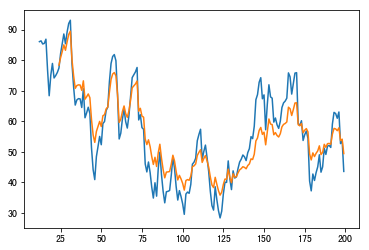

In [52]:
short=talib.RSI(values['close'].values,timeperiod=12)
long=talib.RSI(values['close'].values,timeperiod=24)
plt.plot(index,short)
plt.plot(index,long)

In [53]:
# 1．白色的短期RSI值在20以下，由下向上交叉黄色的长期RSI值时为买入信号。
# 2．白色的短期RSI值在80以上，由上向下交叉黄色的长期RSI值时为卖出信号。
for i in range(200):
    if short[i]>long[i] and short[i-1]<long[i]: # 金叉买
        print("金叉 %d 买入" % i)
    if short[i]<long[i] and short[i-1]>long[i]: # 死叉卖
        print("死叉 %d 卖出" % i)

金叉 25 买入
金叉 26 买入
金叉 29 买入
死叉 32 卖出
死叉 33 卖出
死叉 34 卖出
死叉 40 卖出
死叉 44 卖出
金叉 55 买入
金叉 56 买入
死叉 61 卖出
死叉 65 卖出
金叉 68 买入
金叉 69 买入
死叉 73 卖出
死叉 75 卖出
死叉 77 卖出
死叉 87 卖出
死叉 95 卖出
死叉 96 卖出
金叉 106 买入
金叉 109 买入
金叉 113 买入
死叉 116 卖出
死叉 117 卖出
金叉 128 买入
死叉 129 卖出
死叉 130 卖出
金叉 131 买入
死叉 132 卖出
金叉 134 买入
金叉 173 买入
死叉 174 卖出
死叉 177 卖出
死叉 178 卖出
金叉 192 买入
死叉 197 卖出
死叉 199 卖出


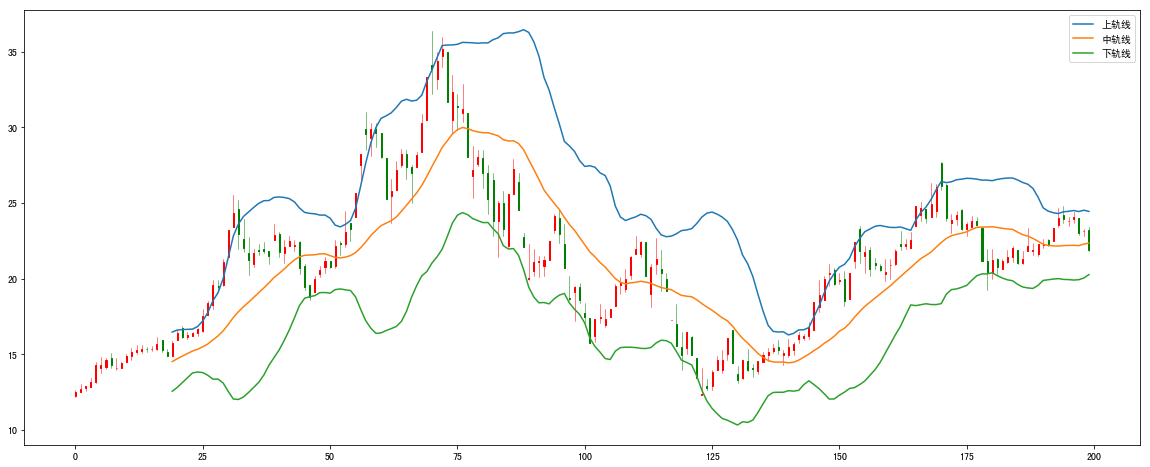

In [56]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(20,8))
values=stock_day[['open','close','high','low']][:200]
values['time']=[i for i in range(200)]
values=values[['time','open','close','high','low']]
candlestick_ochl(axes,values.values,colorup="r",colordown='g')

dif,dea,macd=talib.MACD(values['close'].values,fastperiod=12,slowperiod=26,signalperiod=9)

index=values['time'].values
# 绘制布林线
up,mid,down=talib.BBANDS(values['close'].values,timeperiod=20,nbdevup=2,nbdevdn=2)
plt.plot(index,up,label='上轨线')
plt.plot(index,mid,label='中轨线')
plt.plot(index,down,label='下轨线')

plt.legend()

plt.show()